### Importing Dataset & Library's :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_squared_error

In [3]:
df = pd.read_excel(r"C:\Users\DELL\Downloads\Advanced ML -- Exam\Flight_Price_Train.xlsx")
LD = pd.read_excel(r"C:\Users\DELL\Downloads\Advanced ML -- Exam\Flight_Price_Test.xlsx")

## Perform Feature Engineering

##### a. Perform basic exploration like checking for top 5 records, shape, statistical info, duplicates, Null values etc.

##### Top 5 Rows :

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


##### Shape & Info Table

In [5]:
def info(df):
    print("\n","#################    Preliminary Information Of Columns before treatment    ##################","\n")
    print("\n","--------------------------------------INFO_TABLE---------------------------------------","\n")
    print(f"Information of Dataframe : {df.info()}.")
    print("\n","--------------------------------------BASIC_INFO---------------------------------------","\n")
    print(f"Rows in Table are : {df.shape[0]}.")
    print(f"Columns in Table are : {df.shape[1]}.")
    print(f"categorical Columns in Table are : {len(df.select_dtypes(object).columns)}.")
    print(f"Numerical Columns in Table are : {len(df.select_dtypes(np.number).columns)}.","\n")
    print("-----------------------------------------------------------------------------------------","\n")

info(df)


 #################    Preliminary Information Of Columns before treatment    ################## 


 --------------------------------------INFO_TABLE--------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
Information of Dataframe : None.

 ---------------------------

#####  Statistics

In [6]:
print("\n","--------------------------------------Statistic's---------------------------------------","\n")
print("1. The Statistics of Numerical Table :","\n")
pd.DataFrame(df.describe())


 --------------------------------------Statistic's--------------------------------------- 

1. The Statistics of Numerical Table : 



,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
print("\n","--------------------------------------Statistic's---------------------------------------","\n")
print("2. The Statistics of Categorical Table :","\n")
pd.DataFrame(df.select_dtypes(object).describe())


 --------------------------------------Statistic's--------------------------------------- 

2. The Statistics of Categorical Table : 



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


##### Treatment of Dupticed value :

In [8]:
def Treat_duplicated(df):
    a = df.duplicated().sum()
    if a >= 1:
        print(f"1. Table Contain's {a} Duplicated Values. So, We have to remove it.")
        df.drop_duplicates(inplace=True)
        print("2. Duplicate's Values are treated")
    else:
        print("1. Table doesn't Contain Duplicates Values.")
        
Treat_duplicated(df)

1. Table Contain's 220 Duplicated Values. So, We have to remove it.
2. Duplicate's Values are treated


##### Treatment Of Null Values :

In [9]:
pd.DataFrame(df.isna().sum())                   #### Table contain very less missing Values(only 2), So We remove them

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [10]:
df.dropna(inplace=True)
a = pd.DataFrame(df.isna().sum())
a

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


### Data_Cleaning :

In [11]:
del df['Route']
### This Does not effect on model but it included in stops column.

In [12]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Dep_Time'] = df['Dep_Time'].dt.hour
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])
df['Arrival_Time'] = df['Arrival_Time'].dt.hour

In [13]:
def Time(df):
    if (df > 4 ) and (df <= 8):
        return "Early Morning"
    elif (df > 8 ) and (df <= 12):
        return "Morning"
    elif (df > 12 ) and (df <= 16):
        return "AfterNoon"
    elif (df > 16 ) and (df <= 20):
        return "Evening"
    elif (df > 20 ) and (df <= 24):
        return "Night"
    else:
        "Mid_Night"
        
df['Dep_Time'] = df['Dep_Time'].apply(Time)
df['Arrival_Time'] = df['Arrival_Time'].apply(Time)

### This values are converted into Day interval for better model.

<Axes: xlabel='Arrival_Time'>

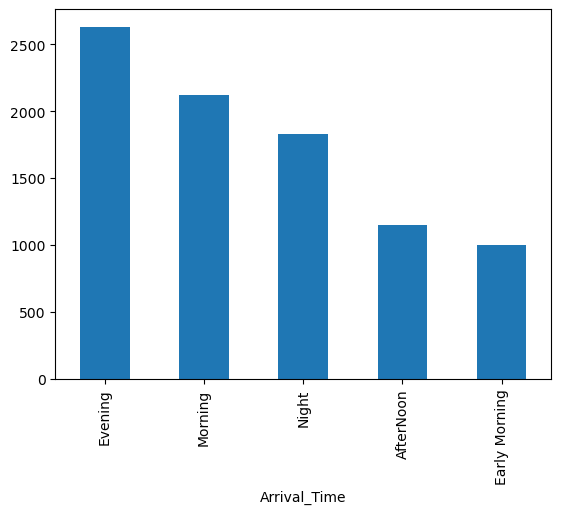

In [14]:
df['Arrival_Time'].value_counts().plot(kind='bar')     ### Customer mostly prefer flights have Evening arrival time for their satisfaction

<Axes: xlabel='Dep_Time'>

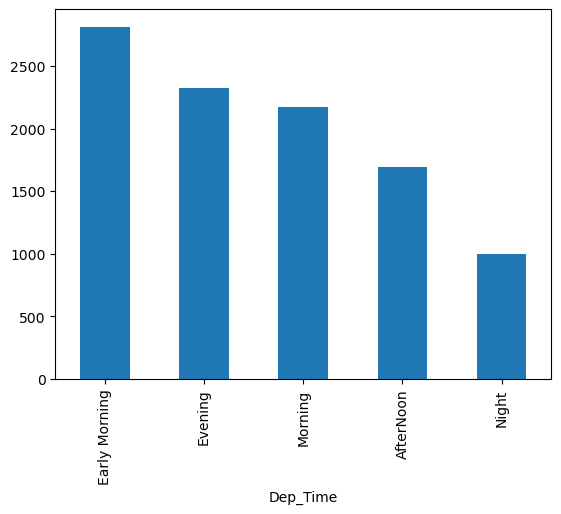

In [15]:
df['Dep_Time'].value_counts().plot(kind='bar')  ### Customer mostly prefer flights have Early Morning Departure time for their satisfaction to arrive to their destination in evening.

In [16]:
df["Duration_min"] = df['Duration'].str.replace('h',"*60").str.replace(' ','+').str.replace('m','*1').apply(eval)
del df['Duration']   ### Convert Duration Column into Duration_min.

In [17]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration_min
0,IndiGo,24/03/2019,Banglore,New Delhi,Night,None,non-stop,No info,3897,170
1,Air India,1/05/2019,Kolkata,Banglore,Early Morning,AfterNoon,2 stops,No info,7662,445
2,Jet Airways,9/06/2019,Delhi,Cochin,Morning,None,2 stops,No info,13882,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,Evening,Night,1 stop,No info,6218,325
4,IndiGo,01/03/2019,Banglore,New Delhi,AfterNoon,Night,1 stop,No info,13302,285


##### b) Extract Date, Month, Year from Date of Journey column

In [18]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [19]:
df['Date'] = df['Date_of_Journey'].dt.day
df['Month'] = df['Date_of_Journey'].dt.month
df['year'] = df['Date_of_Journey'].dt.year

In [20]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration_min,Date,Month,year
0,IndiGo,2019-03-24,Banglore,New Delhi,Night,None,non-stop,No info,3897,170,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,Early Morning,AfterNoon,2 stops,No info,7662,445,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,Morning,None,2 stops,No info,13882,1140,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,Evening,Night,1 stop,No info,6218,325,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,AfterNoon,Night,1 stop,No info,13302,285,1,3,2019


## Q.2 Perform EDA

##### a.  Which airline is most preferred airline

<Axes: ylabel='count'>

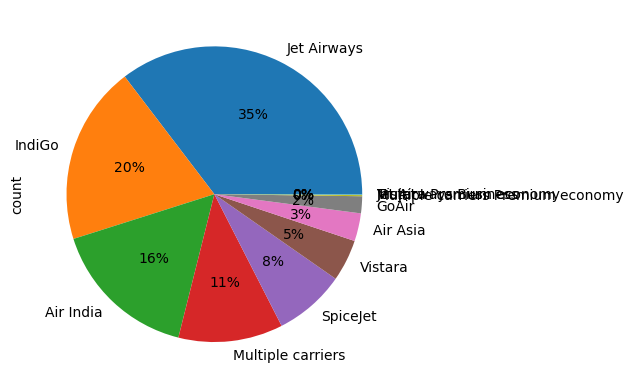

In [21]:
df.Airline.value_counts().plot.pie(autopct = "%1.f%%")

### Interpretation : Jet Airways have more preference than any other Airlines & preference is 35%.

##### b. Find the majority of the flights take off from which source

<Axes: ylabel='count'>

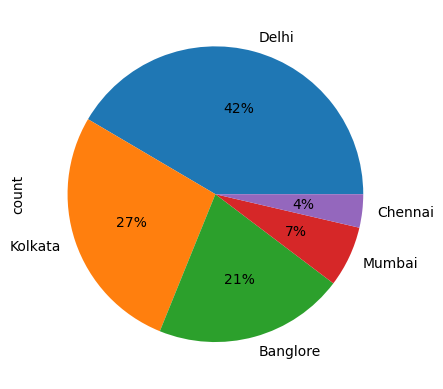

In [22]:
df.Source.value_counts().plot.pie(autopct = "%1.f%%")

## Interpretation :The majority of the flights take off from source which is Delhi is about 42%

##### c. Find maximum flights land in which destination

<Axes: ylabel='count'>

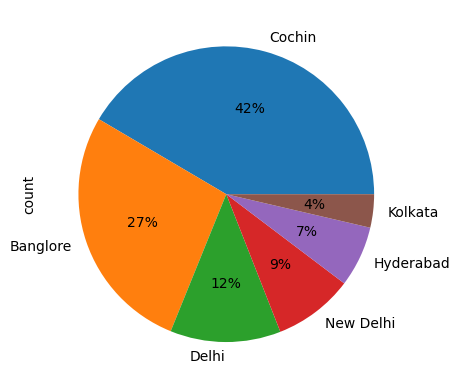

In [23]:
df.Destination.value_counts().plot.pie(autopct = "%1.f%%")

## Interpretation :The maximum flights land in  Cochin Airport as a destination is about 42%.

## Q.3 Compare independent features with Target feature to check the impact on price


##### a. Which airline has the highest price

In [24]:
Airline_High_Price = df.groupby('Airline')['Price'].max()
High_Price = df.groupby("Airline")['Price'].max().max()
print(f'Highest Price of Airline : {Airline_High_Price.idxmax()}')
print(f'Highest Price : {High_Price}')

Highest Price of Airline : Jet Airways Business
Highest Price : 79512


##### b. Check if the business class flights are high price or low and find  only those flights which price is higher than 50k

In [25]:
pd.DataFrame(df['Additional_Info'].value_counts())

,count
Additional_Info,
No info,8182
In-flight meal not included,1926
No check-in baggage included,318
1 Long layover,19
Change airports,7
Business class,4
No Info,3
1 Short layover,1
Red-eye flight,1


In [26]:
Business_Class_flights = df[df['Additional_Info']=='Business class']
Business_Class_flights = Business_Class_flights[['Airline','Price','Additional_Info']]
Business_Class_flights

,Airline,Price,Additional_Info
2924,Jet Airways Business,79512,Business class
3032,Jet Airways,28097,Business class
5372,Jet Airways Business,62427,Business class
10364,Jet Airways Business,57209,Business class


In [27]:
Price_more_50k = df[df['Price'] > 50000]
Flight_name = Price_more_50k[['Airline','Price','Additional_Info']]
print("Interpretation :",f"There {Flight_name.shape[0]} flights are High price Flights.")
Flight_name

Interpretation : There 8 flights are High price Flights.


,Airline,Price,Additional_Info
657,Jet Airways Business,52229,No info
1478,Jet Airways,54826,No info
2618,Jet Airways,54826,No info
2924,Jet Airways Business,79512,Business class
5372,Jet Airways Business,62427,Business class
5439,Jet Airways,54826,No info
9715,Jet Airways Business,52285,No info
10364,Jet Airways Business,57209,Business class


In [28]:
ab = Flight_name.loc[(Flight_name.Price > 50000) & (Flight_name.Additional_Info == "Business class"),:]
print("Interpretation :",f"There are only {ab.shape[0]} among {Business_Class_flights.shape[0]} Business class Flights which is high price Flight.")
ab

Interpretation : There are only 3 among 4 Business class Flights which is high price Flight.


,Airline,Price,Additional_Info
2924,Jet Airways Business,79512,Business class
5372,Jet Airways Business,62427,Business class
10364,Jet Airways Business,57209,Business class


## Perform Encoder:

In [29]:
num_df = df.select_dtypes(include=np.number)
cat_df = df.select_dtypes(include=object)
cat_df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,Night,None,non-stop,No info
1,Air India,Kolkata,Banglore,Early Morning,AfterNoon,2 stops,No info
2,Jet Airways,Delhi,Cochin,Morning,None,2 stops,No info
3,IndiGo,Kolkata,Banglore,Evening,Night,1 stop,No info
4,IndiGo,Banglore,New Delhi,AfterNoon,Night,1 stop,No info


In [30]:
from sklearn.preprocessing import LabelEncoder

cat_df = cat_df.apply(LabelEncoder().fit_transform)
cat_df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info
0,3,0,5,4,5,4,8
1,1,3,0,1,0,1,8
2,4,2,1,3,5,1,8
3,3,3,0,2,4,0,8
4,3,0,5,0,4,0,8


In [31]:
Final_df = pd.concat([cat_df,num_df],axis=1)
Final_df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration_min,Date,Month,year
0,3,0,5,4,5,4,8,3897,170,24,3,2019
1,1,3,0,1,0,1,8,7662,445,1,5,2019
2,4,2,1,3,5,1,8,13882,1140,9,6,2019
3,3,3,0,2,4,0,8,6218,325,12,5,2019
4,3,0,5,0,4,0,8,13302,285,1,3,2019


In [32]:
Final_df['Price'] = np.sqrt(Final_df['Price'])

In [33]:
from sklearn.model_selection import train_test_split
x = Final_df.drop('Price',axis=1)
y = Final_df['Price']

X_train, X_test , Y_train , Y_test = train_test_split(x,y,test_size=0.3,random_state=123)

### Model Building:

In [34]:
Algorithms = [["1. LinearRegression :",LinearRegression()],
             ["2. Ridge :",Ridge()],
             ["3. Lasso :",Lasso()],
             ["4. DecisionTreeRegressor :",DecisionTreeRegressor()],
             ["5. RandomForestRegressor :",RandomForestRegressor()],
             ["6. KNN :",KNeighborsRegressor()],
             ["7. GradientBoostingRegressor :",GradientBoostingRegressor()],
             ["8. AdaBoostRegressor :",AdaBoostRegressor()],
             ["9. XGBRegressor :",XGBRegressor()]]

In [35]:
R2_train_ = []
rmse_train = []
R2_test_ = []
rmse_test = []


for name , model in Algorithms:
    model.fit(X_train,Y_train)
    Train_pre = model.predict(X_train)
    Test_pre = model.predict(X_test)
    R2_train = round(r2_score(Y_train,Train_pre)*100,2)
    R2_train_.append(R2_train)
    RMSE_train = round(np.sqrt(mean_squared_error(Y_train,Train_pre)),2)
    rmse_train.append(RMSE_train)
    R2_test = round(r2_score(Y_test,Test_pre)*100,2)
    R2_test_.append(R2_test)
    RMSE_test = round(np.sqrt(mean_squared_error(Y_test,Test_pre)),2)
    rmse_test.append(RMSE_test)

In [36]:
Algorithms = ["LinearRegression","Ridge","Lasso","DecisionTree","RandomForest","KNN","GBoosting","AdaBoost","XGB"]
ab = {"Algorithms":Algorithms,
      "R2_train_":R2_train_,
      "R2_test_":R2_test_,
      "rmse_train":rmse_train,
      "rmse_test":rmse_test}
ab = pd.DataFrame(ab)
ab = ab.set_index('Algorithms')
cd = ab.style.applymap(lambda x: 'background-color: green' if ( (x < 90 and x > 70) or x < 10) else "background-color: orange" )
cd

,R2_train_,R2_test_,rmse_train,rmse_test
Algorithms,,,,
LinearRegression,49.070000,51.790000,16.780000,15.710000
Ridge,49.070000,51.790000,16.780000,15.710000
Lasso,48.620000,51.580000,16.860000,15.750000
DecisionTree,99.550000,85.470000,1.580000,8.630000
RandomForest,98.290000,91.520000,3.070000,6.590000
KNN,76.750000,65.660000,11.340000,13.260000
GBoosting,85.430000,84.910000,8.980000,8.790000
AdaBoost,57.680000,55.380000,15.300000,15.120000
XGB,96.180000,92.330000,4.590000,6.270000


### Interpretation:

Text(0.5, 0, 'Test_RMSE_Score')

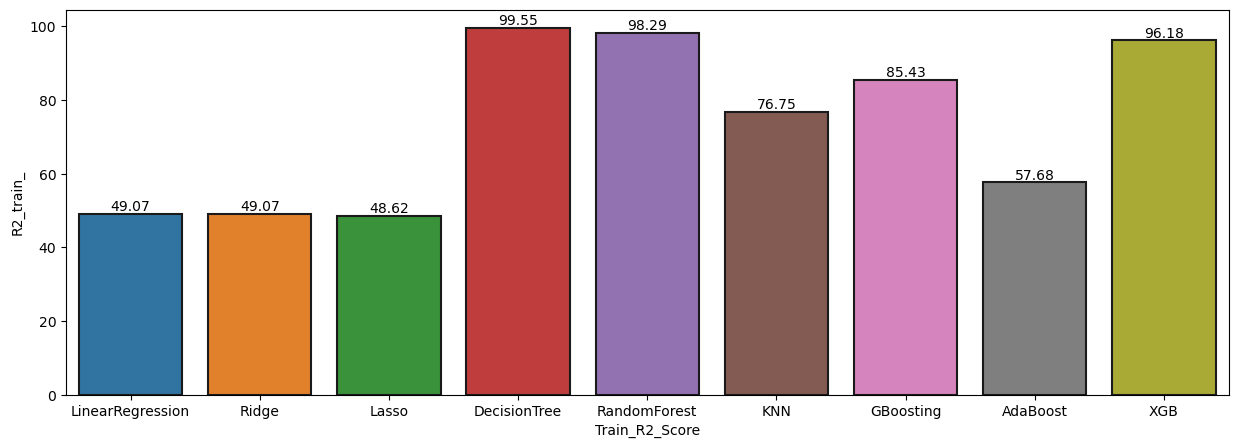

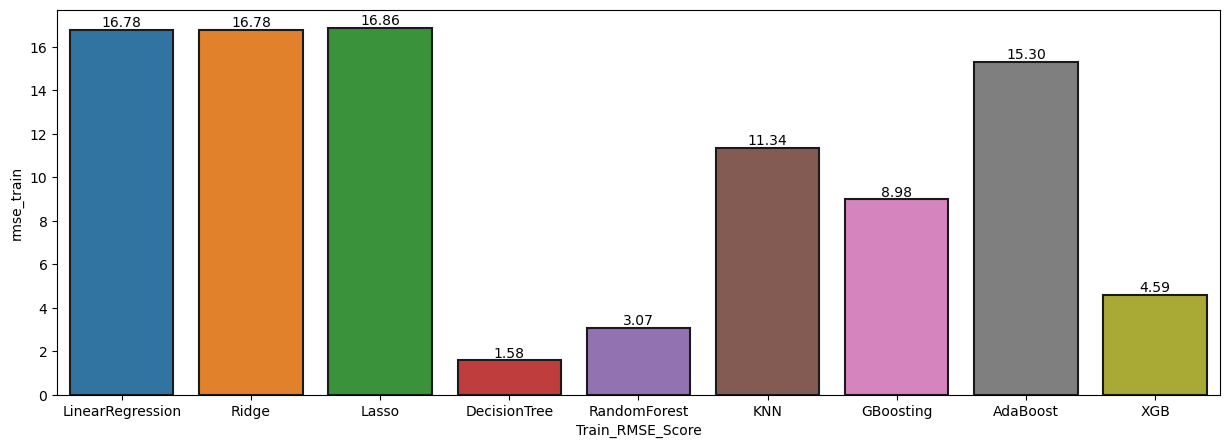

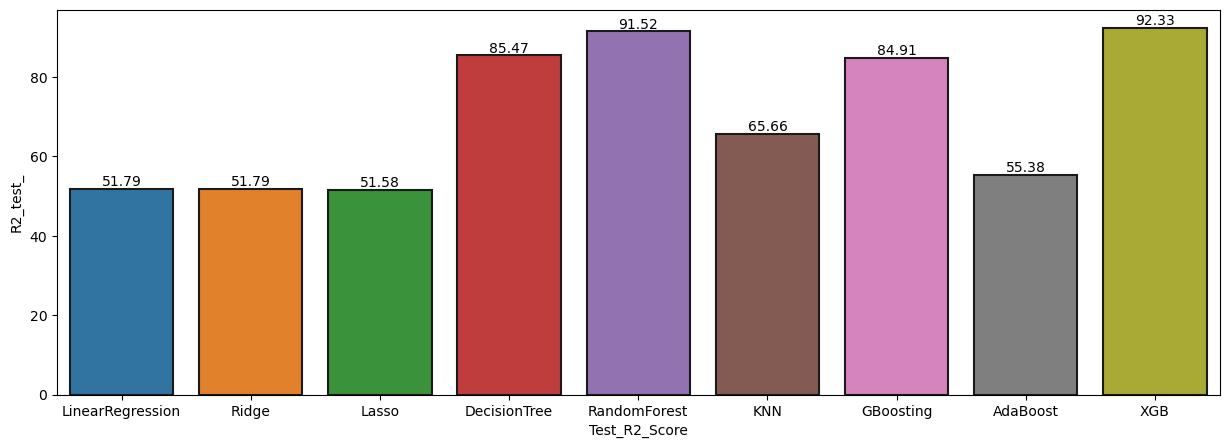

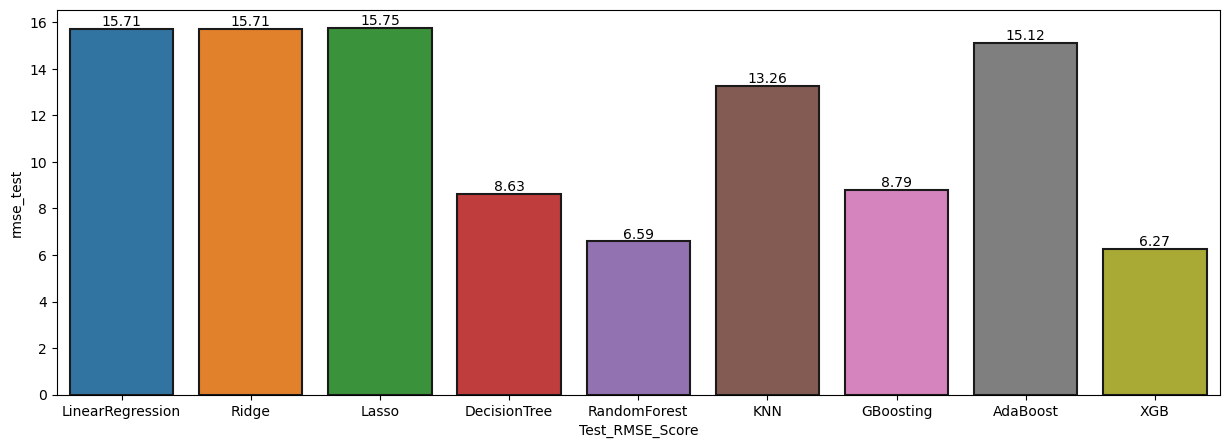

In [37]:
plt.figure(figsize=(15,5))
plots = sns.barplot(x =Algorithms,y =ab['R2_train_'] ,linewidth = 1.5, edgecolor='0.1')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.2f'),
                  (bar.get_x() + bar.get_width()/2,
                  bar.get_height()), ha = 'center', va='center',
                  size = 10, xytext = (0,5),
                  textcoords = 'offset points')
plt.xlabel("Train_R2_Score")

plt.figure(figsize=(15,5))
plots = sns.barplot(x =Algorithms,y = ab['rmse_train'],linewidth = 1.5, edgecolor='0.1')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.2f'),
                  (bar.get_x() + bar.get_width()/2,
                  bar.get_height()), ha = 'center', va='center',
                  size = 10, xytext = (0,5),
                  textcoords = 'offset points')
plt.xlabel("Train_RMSE_Score")

plt.figure(figsize=(15,5))
plots = sns.barplot(x =Algorithms,y = ab['R2_test_'],linewidth = 1.5, edgecolor='0.1')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.2f'),
                  (bar.get_x() + bar.get_width()/2,
                  bar.get_height()), ha = 'center', va='center',
                  size = 10, xytext = (0,5),
                  textcoords = 'offset points')
plt.xlabel("Test_R2_Score")


plt.figure(figsize=(15,5))
plots = sns.barplot(x =Algorithms,y = ab['rmse_test'],linewidth = 1.5, edgecolor='0.1')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.2f'),
                  (bar.get_x() + bar.get_width()/2,
                  bar.get_height()), ha = 'center', va='center',
                  size = 10, xytext = (0,5),
                  textcoords = 'offset points')
plt.xlabel("Test_RMSE_Score")

#### Interpretation:
1. R2 Score on Train Dataset by Linear Regression ,Lasso,Ridge & Adaboosting is less than 70% which means models prone toward Underfitting.
2. R2 Score on Train  & test Dataset by Decision Tree, Random Forest & XGBoosting is more than  90% which means models prone toward overfitting.
3. R2 Score on Train Dataset by KNN is 76% and on test dataset score is 64% which means Model is Overfitting.
4. R2 score of Gboosting is on train is 86 % & on test is 84 % which means model is good-fit & also log function (RMSE) is less than 10.

so, Thats why we do Prunning Techniqe on DT,RF,XGB & GB to evaluate model.

In [38]:
## DT :
params = {"max_depth":[3,4,5],
         "min_samples_split":[100,110,120],
         "min_samples_leaf":[50,60,70]}

from sklearn.model_selection import GridSearchCV

gridcv = GridSearchCV(DecisionTreeRegressor(),
                     params,
                     verbose = 1,
                     cv = 10)
gridcv.fit(X_train,Y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_leaf': [50, 60, 70],
                         'min_samples_split': [100, 110, 120]},
             verbose=1)

In [39]:
DT = gridcv.best_params_
DT

{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 100}

In [40]:
## RF :
params = {"max_depth":[3,4,5],
         "min_samples_split":[100,110,120],
         "min_samples_leaf":[50,60,70],
         'n_estimators':[25,50]}

from sklearn.model_selection import GridSearchCV

gridcv = GridSearchCV(RandomForestRegressor(),
                     params,
                     verbose = 1,
                     cv = 10)
gridcv.fit(X_train,Y_train)


Fitting 10 folds for each of 54 candidates, totalling 540 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_leaf': [50, 60, 70],
                         'min_samples_split': [100, 110, 120],
                         'n_estimators': [25, 50]},
             verbose=1)

In [41]:
RF = gridcv.best_params_
RF

{'max_depth': 5,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 50}

In [42]:
## Gboosting :
params = {"max_depth":[3,4,5],
         "min_samples_split":[100,110,120],
         "min_samples_leaf":[50,60,70],
         'n_estimators':[25,50],
         'learning_rate':[0.7,0.8,0.6]}

from sklearn.model_selection import GridSearchCV

gridcv = GridSearchCV(GradientBoostingRegressor(loss = 'squared_error',criterion ='squared_error'),
                     params,
                     verbose = 1,
                     cv = 10)
gridcv.fit(X_train,Y_train)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


GridSearchCV(cv=10,
             estimator=GradientBoostingRegressor(criterion='squared_error'),
             param_grid={'learning_rate': [0.7, 0.8, 0.6],
                         'max_depth': [3, 4, 5],
                         'min_samples_leaf': [50, 60, 70],
                         'min_samples_split': [100, 110, 120],
                         'n_estimators': [25, 50]},
             verbose=1)

In [43]:
GB = gridcv.best_params_
GB

{'learning_rate': 0.7,
 'max_depth': 5,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 50}

In [44]:
## XGboosting :
params = {"max_depth":[3,4,5],
         "min_samples_split":[100,110,120],
         "min_samples_leaf":[50,60,70],
         'n_estimators':[25,50],
         'learning_rate':[0.7,0.8,0.6],
         'reg_lambda':[0,1,2]}

from sklearn.model_selection import GridSearchCV

gridcv = GridSearchCV(XGBRegressor(),
                     param_grid=params,
                     verbose = 1,
                     cv = 10,
                     n_jobs=-1,
                     scoring='accuracy')
gridcv.fit(X_train,Y_train)

Fitting 10 folds for each of 486 candidates, totalling 4860 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.7, 0.8, 0.6],
                         'max_depth': [3, 4, 5],
                         'min_samples_leaf': [50, 60, 70],
                         'min_samples_split': [100, 110, 120],
                         'n_estimators': [25, 50], 'reg_lambda': [0, 1, 2]},
             scoring='accuracy', verbose=1)

In [45]:
XGB = gridcv.best_params_
XGB

{'learning_rate': 0.7,
 'max_depth': 3,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 25,
 'reg_lambda': 0}

In [46]:
Algorithms = [["4. DecisionTreeRegressor :",DecisionTreeRegressor(**DT)],
             ["5. RandomForestRegressor :",RandomForestRegressor(**RF)],
             ["7. GradientBoostingRegressor :",GradientBoostingRegressor(**GB)],
             ["9. XGBRegressor :",XGBRegressor(**XGB)]]

In [47]:
R2_train_ = []
rmse_train = []
R2_test_ = []
rmse_test = []


for name , model in Algorithms:
    model.fit(X_train,Y_train)
    Train_pre = model.predict(X_train)
    Test_pre = model.predict(X_test)
    R2_train = round(r2_score(Y_train,Train_pre)*100,2)
    R2_train_.append(R2_train)
    RMSE_train = round(np.sqrt(mean_squared_error(Y_train,Train_pre)),2)
    rmse_train.append(RMSE_train)
    R2_test = round(r2_score(Y_test,Test_pre)*100,2)
    R2_test_.append(R2_test)
    RMSE_test = round(np.sqrt(mean_squared_error(Y_test,Test_pre)),2)
    rmse_test.append(RMSE_test)

In [48]:
Algorithms = ["DecisionTree","RandomForest","GBoosting","XGB"]
ab = {"Algorithms":Algorithms,
      "R2_train_":R2_train_,
      "R2_test_":R2_test_,
      "rmse_train":rmse_train,
      "rmse_test":rmse_test}
ab = pd.DataFrame(ab)
ab = ab.set_index('Algorithms')
cd = ab.style.applymap(lambda x: 'background-color: green' if ( (x < 90 and x > 70) or x < 10) else "background-color: orange" )
cd

,R2_train_,R2_test_,rmse_train,rmse_test
Algorithms,,,,
DecisionTree,73.220000,75.820000,12.170000,11.130000
RandomForest,74.390000,76.960000,11.900000,10.860000
GBoosting,91.670000,89.450000,6.790000,7.350000
XGB,86.400000,85.300000,8.670000,8.680000


Text(0.5, 0, 'Test_RMSE_Score')

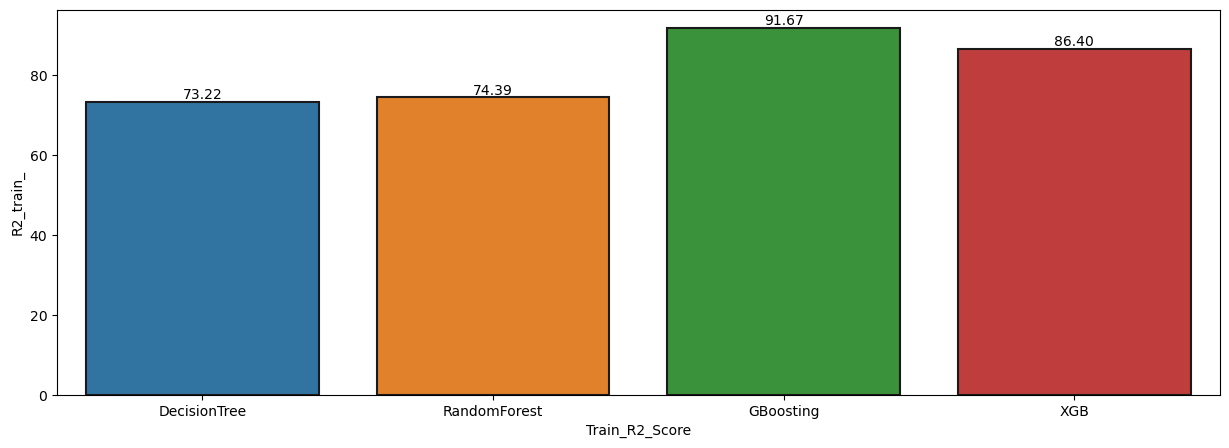

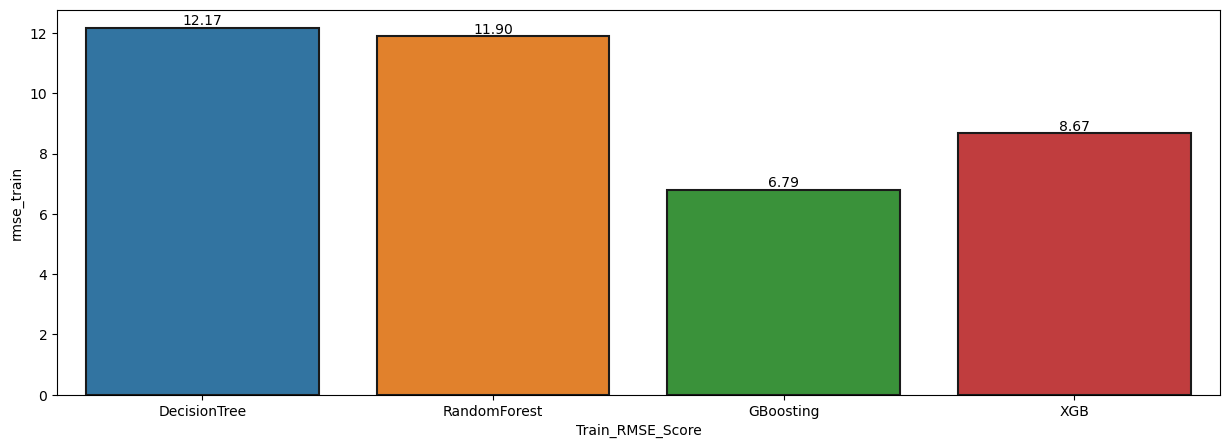

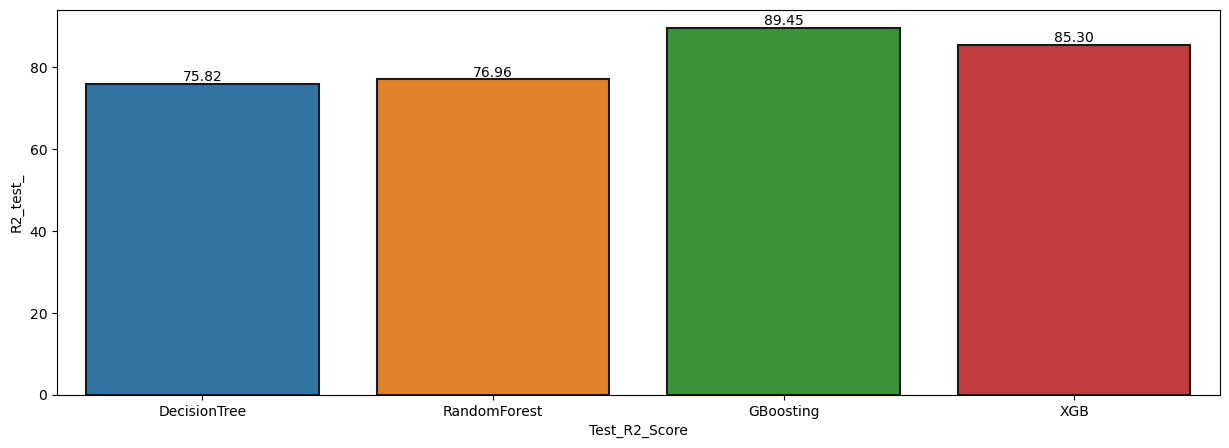

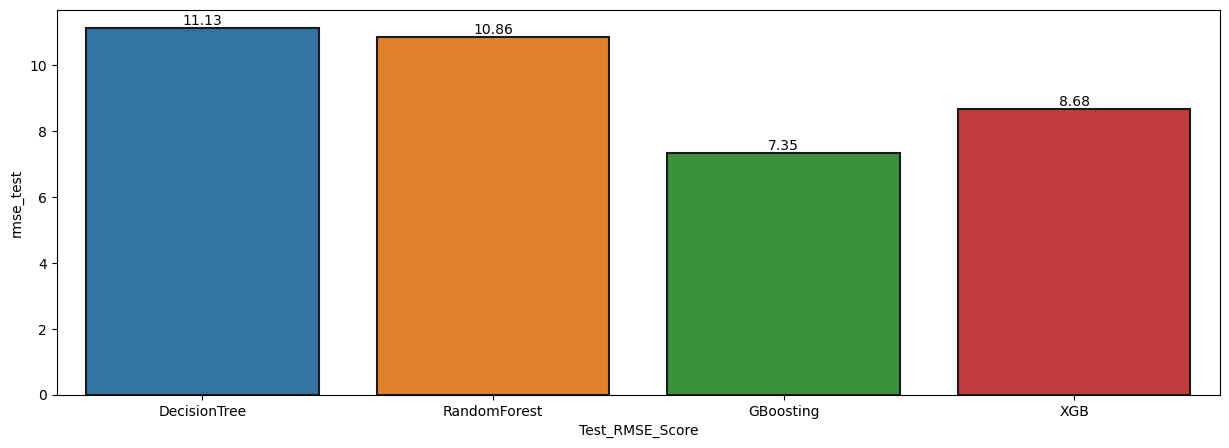

In [49]:
plt.figure(figsize=(15,5))
plots = sns.barplot(x =Algorithms,y =ab['R2_train_'] ,linewidth = 1.5, edgecolor='0.1')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.2f'),
                  (bar.get_x() + bar.get_width()/2,
                  bar.get_height()), ha = 'center', va='center',
                  size = 10, xytext = (0,5),
                  textcoords = 'offset points')
plt.xlabel("Train_R2_Score")

plt.figure(figsize=(15,5))
plots = sns.barplot(x =Algorithms,y = ab['rmse_train'],linewidth = 1.5, edgecolor='0.1')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.2f'),
                  (bar.get_x() + bar.get_width()/2,
                  bar.get_height()), ha = 'center', va='center',
                  size = 10, xytext = (0,5),
                  textcoords = 'offset points')
plt.xlabel("Train_RMSE_Score")

plt.figure(figsize=(15,5))
plots = sns.barplot(x =Algorithms,y = ab['R2_test_'],linewidth = 1.5, edgecolor='0.1')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.2f'),
                  (bar.get_x() + bar.get_width()/2,
                  bar.get_height()), ha = 'center', va='center',
                  size = 10, xytext = (0,5),
                  textcoords = 'offset points')
plt.xlabel("Test_R2_Score")


plt.figure(figsize=(15,5))
plots = sns.barplot(x =Algorithms,y = ab['rmse_test'],linewidth = 1.5, edgecolor='0.1')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.2f'),
                  (bar.get_x() + bar.get_width()/2,
                  bar.get_height()), ha = 'center', va='center',
                  size = 10, xytext = (0,5),
                  textcoords = 'offset points')
plt.xlabel("Test_RMSE_Score")

#### Interpretation:
1. Decision Tree and Random Forest Good fit on Both Train & Test Data but Log function crosses the boundary(RMSE > 10).
2. GBoosting Overfit on train Data.
3. XGBoosting Good-fit on Train & Test Data but also stay in limit of Log Function (RMSE <=10).

Therefore, We use XGB as a model to make predictions.

In [50]:
model = XGBRegressor(**XGB)
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.7, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, min_samples_leaf=50, min_samples_split=100,
             missing=nan, monotone_constraints=None, multi_strategy=None,
             n_estimators=25, n_jobs=None, ...)

In [51]:
train = pd.concat([X_train,Y_train],axis=1)
test = pd.concat([X_test,Y_test],axis=1)

In [52]:
Train_pre = model.predict(X_train)
train['Prediction'] = Train_pre
Test_pre = model.predict(X_test)
test['Prediction'] = Test_pre
R2_train = round(r2_score(Y_train,Train_pre)*100,2)
print("R2_train :",R2_train)
RMSE_train = round(np.sqrt(mean_squared_error(Y_train,Train_pre)),2)
print("RMSE_train :",RMSE_train)
R2_test = round(r2_score(Y_test,Test_pre)*100,2)
print("R2_test :",R2_test)
RMSE_test = round(np.sqrt(mean_squared_error(Y_test,Test_pre)),2)
print("RMSE_test :",RMSE_test)

R2_train : 86.4
RMSE_train : 8.67
R2_test : 85.3
RMSE_test : 8.68


In [53]:
train['Original_price'] = round(np.square(train['Price']),2)
train['Original_price_pre'] = round(np.square(train['Prediction']),2)

test['Original_price'] = round(np.square(test['Price']),2)
test['Original_price_pre'] = round(np.square(test['Prediction']),2)

In [54]:
Submission = pd.concat([train,test],axis=0)
Submission.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Duration_min,Date,Month,year,Price,Prediction,Original_price,Original_price_pre
9863,8,2,1,1,0,0,7,270,3,4,2019,64.015623,66.016861,4098.0,4358.229980
1117,0,0,5,1,1,4,8,170,24,3,2019,58.163562,62.216526,3383.0,3870.899902
8165,4,3,0,2,3,0,8,800,6,5,2019,119.949990,118.146355,14388.0,13958.559570
314,3,1,4,0,0,4,8,135,6,3,2019,85.410772,85.324699,7295.0,7280.299805
2225,4,0,2,2,4,4,5,185,9,5,2019,60.844063,74.904366,3702.0,5610.660156


##### Prediction On Live Data :

In [55]:
LD.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [56]:
LD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [57]:
LD.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [58]:
del LD['Route']
### This Does not effect on model but it included in stops column.

In [59]:
LD['Dep_Time'] = pd.to_datetime(LD['Dep_Time'])
LD['Dep_Time'] = LD['Dep_Time'].dt.hour
LD['Arrival_Time'] = pd.to_datetime(LD['Arrival_Time'])
LD['Arrival_Time'] = LD['Arrival_Time'].dt.hour

In [60]:
def Time(df):
    if (df > 4 ) and (df <= 8):
        return "Early Morning"
    elif (df > 8 ) and (df <= 12):
        return "Morning"
    elif (df > 12 ) and (df <= 16):
        return "AfterNoon"
    elif (df > 16 ) and (df <= 20):
        return "Evening"
    elif (df > 20 ) and (df <= 24):
        return "Night"
    else:
        "Mid_Night"
        
LD['Dep_Time'] = LD['Dep_Time'].apply(lambda x :Time(x))
LD['Arrival_Time'] = LD['Arrival_Time'].apply(lambda x :Time(x))

### This values are converted into Day interval for better model.

In [61]:
LD["Duration_min"] = LD['Duration'].str.replace('h',"*60").str.replace(' ','+').str.replace('m','*1').apply(eval)
del LD['Duration'] 

In [62]:
LD['Date_of_Journey'] = pd.to_datetime(LD['Date_of_Journey'], format='%d/%m/%Y')

In [63]:
LD['Date'] = LD['Date_of_Journey'].dt.day
LD['Month'] = LD['Date_of_Journey'].dt.month
LD['year'] = LD['Date_of_Journey'].dt.year

In [64]:
del LD['Date_of_Journey']

In [65]:
LD.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Duration_min,Date,Month,year
0,Jet Airways,Delhi,Cochin,Evening,None,1 stop,No info,655,6,6,2019
1,IndiGo,Kolkata,Banglore,Early Morning,Morning,1 stop,No info,240,12,5,2019
2,Jet Airways,Delhi,Cochin,Evening,Evening,1 stop,In-flight meal not included,1425,21,5,2019
3,Multiple carriers,Delhi,Cochin,Early Morning,Night,1 stop,No info,780,21,5,2019
4,Air Asia,Banglore,Delhi,Night,None,non-stop,No info,170,24,6,2019


In [66]:
num_LD = LD.select_dtypes(include=np.number)
cat_LD = LD.select_dtypes(include=object)
cat_LD.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info
0,Jet Airways,Delhi,Cochin,Evening,None,1 stop,No info
1,IndiGo,Kolkata,Banglore,Early Morning,Morning,1 stop,No info
2,Jet Airways,Delhi,Cochin,Evening,Evening,1 stop,In-flight meal not included
3,Multiple carriers,Delhi,Cochin,Early Morning,Night,1 stop,No info
4,Air Asia,Banglore,Delhi,Night,None,non-stop,No info


In [67]:
from sklearn.preprocessing import LabelEncoder

cat_LD = cat_LD.apply(LabelEncoder().fit_transform)
cat_LD.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info
0,4,2,1,2,5,0,5
1,3,3,0,1,3,0,5
2,4,2,1,2,2,0,3
3,6,2,1,1,4,0,5
4,0,0,2,4,5,4,5


In [68]:
Final_LD = pd.concat([cat_LD,num_LD],axis=1)
Final_LD.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Duration_min,Date,Month,year
0,4,2,1,2,5,0,5,655,6,6,2019
1,3,3,0,1,3,0,5,240,12,5,2019
2,4,2,1,2,2,0,3,1425,21,5,2019
3,6,2,1,1,4,0,5,780,21,5,2019
4,0,0,2,4,5,4,5,170,24,6,2019


In [69]:
Final_LD['Price_pre'] = model.predict(Final_LD)     ### Value in Squareroot

In [70]:
Final_LD["Original_Price"] = round(Final_LD['Price_pre']**2,2)

#### Submission :

In [71]:
Submission = Final_LD.copy()
Submission.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Duration_min,Date,Month,year,Price_pre,Original_Price
0,4,2,1,2,5,0,5,655,6,6,2019,105.967262,11229.059570
1,3,3,0,1,3,0,5,240,12,5,2019,43.799721,1918.420044
2,4,2,1,2,2,0,3,1425,21,5,2019,145.901779,21287.330078
3,6,2,1,1,4,0,5,780,21,5,2019,92.494461,8555.230469
4,0,0,2,4,5,4,5,170,24,6,2019,40.503242,1640.510010


In [72]:
import pickle
pickle.dump(model, open(r'C:\Users\DELL\Downloads\Advanced ML -- Exam\build.pkl','wb'))